
#PayPal Stock Price Prediction using Linear Regression





In this project, we will use the Linear Regression algorithm to predict the future stock prices of PayPal (PYPL) based on historical data.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

Fetching PayPal Stock Data
We use the yfinance library to fetch the historical stock data for PayPal from January 1, 2021, to January 1, 2024:bold text



In [ ]:
# Fetch PayPal stock data from Yahoo Finance from 2021-01-01 to 2024-01-01
ticker = "PYPL"
data = yf.download(ticker, start="2021-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


View the data

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,237.800003,237.996994,227.535004,231.919998,231.919998,8148700
2021-01-05,230.470001,235.639999,229.800003,234.910004,234.910004,5047800
2021-01-06,228.940002,232.490005,225.701996,226.830002,226.830002,9211700
2021-01-07,229.460007,235.600006,229.220001,235.039993,235.039993,7107900
2021-01-08,237.429993,242.910004,236.069000,242.460007,242.460007,6767700
...,...,...,...,...,...,...
2023-12-22,62.169998,62.730000,61.580002,61.840000,61.840000,13164000
2023-12-26,61.950001,62.685001,61.860001,62.560001,62.560001,9940600
2023-12-27,62.669998,62.834999,62.110001,62.680000,62.680000,11112300


#Financial Data Preprocessing and Feature Engineering

Data Preprocessing: Cleaning the data by removing any NaN values and scaling the closing prices between 0 and 1.

Feature Engineering: Creating additional features such as 50-day and 200-day Simple Moving Averages (SMA)

In [ ]:
# Data cleaning
data.dropna(inplace=True)

# Preprocessing the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Feature engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average


Data Visualization: Plotting the stock price along with the SMA features



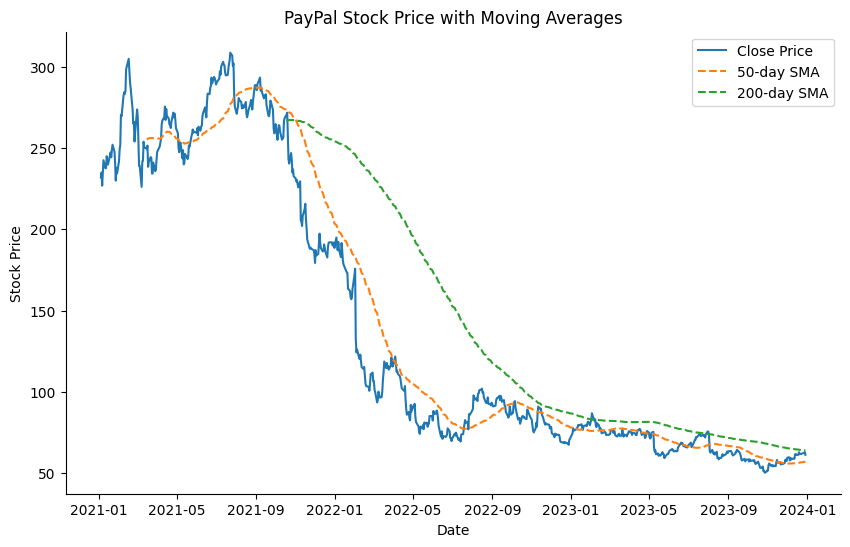

In [ ]:
# Visualize additional features
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='50-day SMA', linestyle='--')
plt.plot(data['SMA_200'], label='200-day SMA', linestyle='--')
plt.title('PayPal Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

The correlation matrix between the columns 'Close', 'SMA_50', and 'SMA_200' of a dataset and then plots a heatmap of the correlation matrix using the seaborn library:

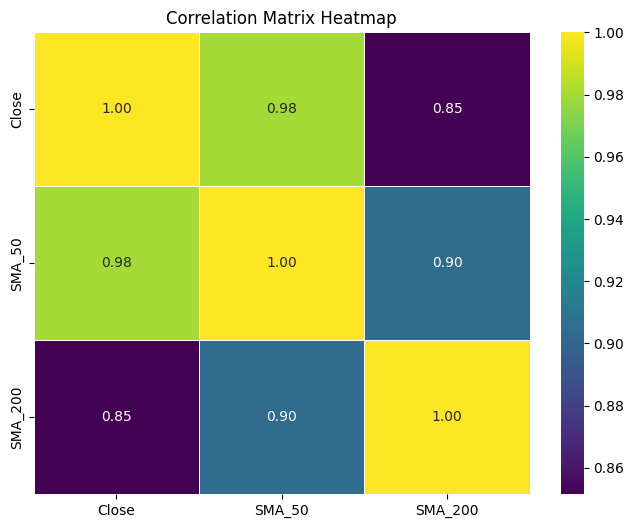

In [ ]:
# Calculate correlation matrix
corr = data[['Close', 'SMA_50', 'SMA_200']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Creating Time Series Data Structure
To prepare the data for each model, we create a time series data structure with a look-back period of 30 days (one month). We split the data into 80% for training and 20% for testing:

In [ ]:
# Create the time series data structure
look_back = 30  # Look back period is one month.

# Use 80% of data for training and 20% for testing
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]

# Generate training and testing sequences of data
X_train = []
y_train = []
for i in range(look_back, len(train_data)):
    X_train.append(train_data[i-look_back:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Model Training: Splitting the data into training and testing sets, generating sequences of data for training, and training KNN, Random Forest, MLP and Linear Regression models.



In [ ]:
# Train and test KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Train and test Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Train and test Multilayer Perceptrons (MLPs) model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [ ]:
# Train and test Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Model Evaluation: Testing the trained models on the test data and calculating the Root Mean Squared Error (RMSE) for each model

In [ ]:
# Prepare test data
X_test = []
y_test = []
for i in range(look_back, len(test_data)):
    X_test.append(test_data[i-look_back:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Predict on test data
knn_predictions = knn_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)


# RMSE of predictions
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_predictions))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))


print(f"KNN RMSE = {np.round(knn_rmse,3)}")
print(f"Random Forest RMSE = {np.round(rf_rmse,3)}")
print(f"MLP RMSE = {np.round(mlp_rmse,3)}")
print(f"Linear Regression RMSE = {np.round(lr_rmse, 3)}")


KNN RMSE = 0.019
Random Forest RMSE = 0.016
MLP RMSE = 0.016
Linear Regression RMSE = 0.006


Model Prediction: Inverting the scaled predictions to the original price scale and plotting the predicted prices along with the actual prices for comparison.

In [ ]:
# Invert predictions
knn_predictions = scaler.inverse_transform(knn_predictions.reshape(-1, 1))
rf_predictions = scaler.inverse_transform(rf_predictions.reshape(-1, 1))
mlp_predictions = scaler.inverse_transform(mlp_predictions.reshape(-1, 1))
lr_predictions = scaler.inverse_transform(lr_predictions.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

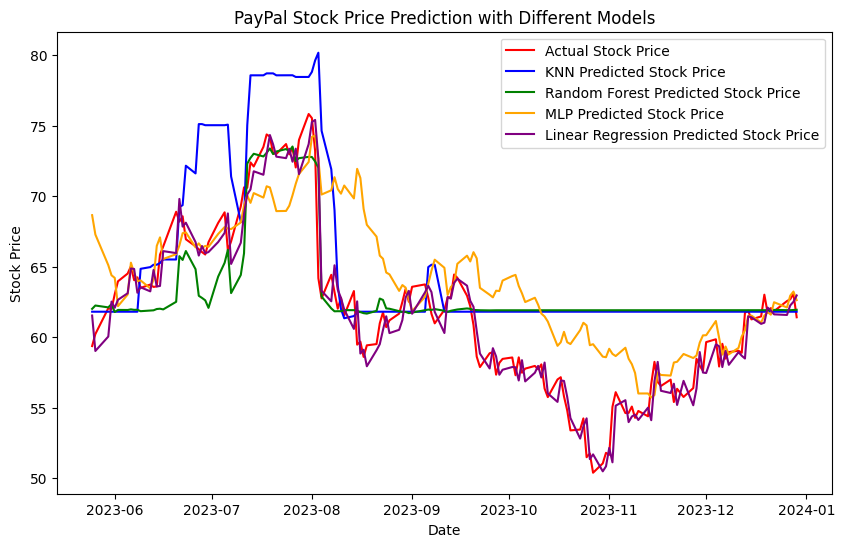

In [ ]:
# Plot the predictions with actual data and other models
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], actual_prices, color='red', label='Actual Stock Price')
plt.plot(data.index[train_size:], knn_predictions, color='blue', label='KNN Predicted Stock Price')
plt.plot(data.index[train_size:], rf_predictions, color='green', label='Random Forest Predicted Stock Price')
plt.plot(data.index[train_size:], mlp_predictions, color='orange', label='MLP Predicted Stock Price')
plt.plot(data.index[train_size:], lr_predictions, color='purple', label='Linear Regression Predicted Stock Price')
plt.title(f'PayPal Stock Price Prediction with Different Models')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Visualizing the Results
Finally, we invert the scaled predictions and actual prices, and plot the results using Linear Regression is Best model Model

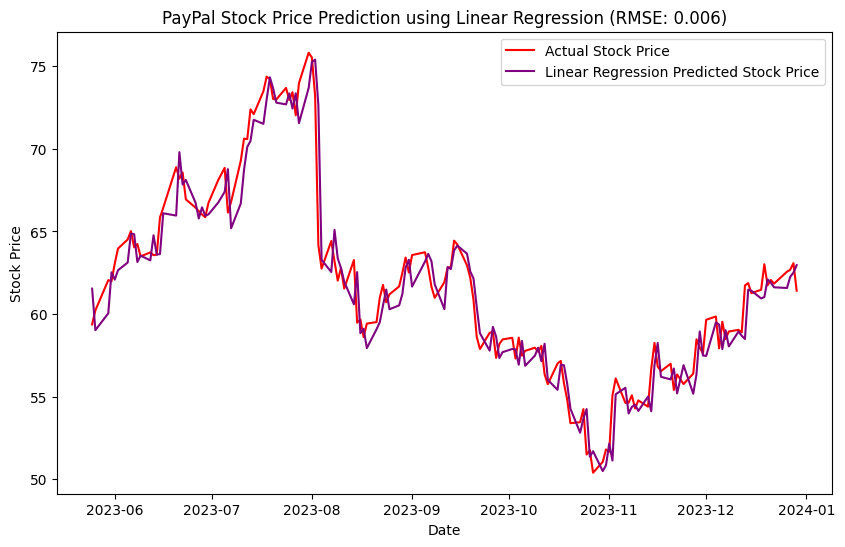

In [ ]:
## Plot the predictions with actual data using Linear Regression (The best model)
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], actual_prices, color='red', label='Actual Stock Price')
plt.plot(data.index[train_size:], lr_predictions, color='purple', label='Linear Regression Predicted Stock Price')
plt.title(f'PayPal Stock Price Prediction using Linear Regression (RMSE: {np.round(lr_rmse, 3)})')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#Conclusion:
The key aspects of this project are:
Machine Learning Model: We utilized the Linear Regression algorithm to predict the future stock prices of PayPal.
Preprocessing Techniques: We applied min-max normalization to the stock price data to scale it between 0 and 1, a common preprocessing step for many machine learning models.
Time Series Data Structure: We organized the data into a time series structure with a look-back period of 30 days to capture the temporal patterns in the stock price data.

After evaluating these models on test data, the Root Mean Squared Error (RMSE) is calculated for each.

Here is the RMSE comparison:

KNN RMSE = 0.019

Random Forest RMSE = 0.016

MLP RMSE = 0.016

#Linear Regression RMSE = 0.006

The Linear Regression model demonstrates the lowest RMSE among the evaluated models, indicating its superior performance in predicting PayPal stock prices. This implies that Linear Regression effectively captures the underlying relationships in the data and provides more accurate predictions compared to the other models.
